### 지역별로 전체 표

In [43]:
import pandas as pd

# 파일 경로 및 월 설정
file_paths = [
    f"../data/경기신보/21_집행-강제경매,임의경매(2024{str(month).zfill(2)}).xlsx"
    for month in range(1, 12)
]
months = [f"2024년 {month}월" for month in range(1, 12)]

# 처리된 데이터프레임을 저장할 리스트 초기화
processed_dataframes = []

for file_path, month in zip(file_paths, months):
    # Excel 파일 읽기
    data = pd.read_excel(file_path)

    # 필요한 열 선택 및 이름 변경
    df = data.iloc[0:74, 0:9]
    df = df.iloc[:, [0, 1, 4, 7]]
    df.columns = [
        '법원',
        f'{month} 강제경매',
        f'{month} 임의경매',
        f'{month} 경매 접수'
    ]

    # 필요 없는 행 삭제 및 인덱스 초기화
    df = df.drop([0, 1]).reset_index(drop=True)

    # 숫자 열 변환
    numeric_columns = df.columns[1:]  # 첫 번째 열(법원)은 제외
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

    # 서울 및 경기 지역 데이터 집계
    seoul_data = df[df["법원"].str.contains("서울중앙지방법원|서울동부지방법원|서울남부지방법원|서울북부지방법원|서울서부지방법원")]
    seoul_totals = seoul_data.sum(numeric_only=True)
    seoul_totals["법원"] = "서울"

    gyeonggi_data = df[df["법원"].str.contains("의정부지방법원|의정부지방법원 고양지원|의정부지방법원 남양주지원|인천지방법원 부천지원|수원지방법원|수원지방법원 성남지원|수원지방법원 여주지원|수원지방법원 평택지원|수원지방법원 안산지원|수원지방법원 안양지원")]
    gyeonggi_totals = gyeonggi_data.sum(numeric_only=True)
    gyeonggi_totals["법원"] = "경기"

    # 집계 데이터를 기존 데이터프레임에 추가
    df = pd.concat([df, pd.DataFrame([seoul_totals])], ignore_index=True)
    df = pd.concat([df, pd.DataFrame([gyeonggi_totals])], ignore_index=True)


    # 특정 행의 값을 지역 이름으로 변경
    region_names = ["인천", "강원", "대전/충남", "충북", "대구/경북", "부산", "울산", "경남", "광주/전남", "전북", "제주"]
    for i, name in zip([9, 24, 31, 36, 46, 50, 51, 58, 64, 69, 70], region_names):
        df.loc[i, "법원"] = name

    # 최종적으로 필요한 지역만 필터링
    result_regions = ["서울", "경기", "인천", "강원", "대전/충남", "충북", "대구/경북", "부산", "울산", "경남", "광주/전남", "전북", "제주"]
    df = df[df["법원"].isin(result_regions)].reset_index(drop=True)

    # 처리된 데이터프레임을 리스트에 추가
    processed_dataframes.append(df)

# 모든 데이터프레임을 "법원" 기준으로 병합
final_df = processed_dataframes[0]
for df in processed_dataframes[1:]:
    final_df = pd.merge(final_df, df, on="법원")

# 합계 행 추가
total_row = final_df.iloc[:, 1:].sum(numeric_only=True)  # 숫자 열의 합계 계산
total_row['법원'] = '합계'  # 법원 컬럼에 '합계' 추가
final_df = pd.concat([final_df, pd.DataFrame([total_row])], ignore_index=True)

final_df

# 최종 데이터프레임을 CSV 파일로 저장
# final_df.to_csv("../data/경기신보/result_final.csv", encoding="utf-8-sig", index=False)

,법원,2024년 1월 강제경매,2024년 1월 임의경매,2024년 1월 경매 접수,2024년 2월 강제경매,2024년 2월 임의경매,2024년 2월 경매 접수,2024년 3월 강제경매,2024년 3월 임의경매,2024년 3월 경매 접수,...,2024년 8월 경매 접수,2024년 9월 강제경매,2024년 9월 임의경매,2024년 9월 경매 접수,2024년 10월 강제경매,2024년 10월 임의경매,2024년 10월 경매 접수,2024년 11월 강제경매,2024년 11월 임의경매,2024년 11월 경매 접수
0,인천,376,453,829,296,426,722,524,434,958,...,906,345,397,742,246,434,680,581,357,938
1,강원,128,258,386,97,203,300,111,214,325,...,305,102,199,301,122,173,295,115,192,307
2,대전/충남,269,704,973,215,601,816,251,626,877,...,852,203,500,703,303,558,861,260,461,721
3,충북,100,264,364,95,235,330,114,201,315,...,355,81,209,290,107,238,345,77,151,228
4,대구/경북,295,718,1013,234,633,867,224,686,910,...,1050,279,638,917,253,728,981,260,520,780
5,부산,166,381,547,145,342,487,162,398,560,...,597,177,364,541,153,357,510,159,268,427
6,울산,82,208,290,53,201,254,48,198,246,...,270,53,165,218,70,187,257,69,133,202
7,경남,201,541,742,178,489,667,175,526,701,...,712,180,481,661,183,499,682,188,370,558
8,광주/전남,276,471,747,207,369,576,202,459,661,...,617,220,414,634,277,475,752,220,360,580
9,전북,122,266,388,133,204,337,140,260,400,...,310,94,213,307,132,225,357,127,204,331


### 월별로 총계, 서울, 경기 건수의 선 그래프

<Figure size 900x500 with 0 Axes>

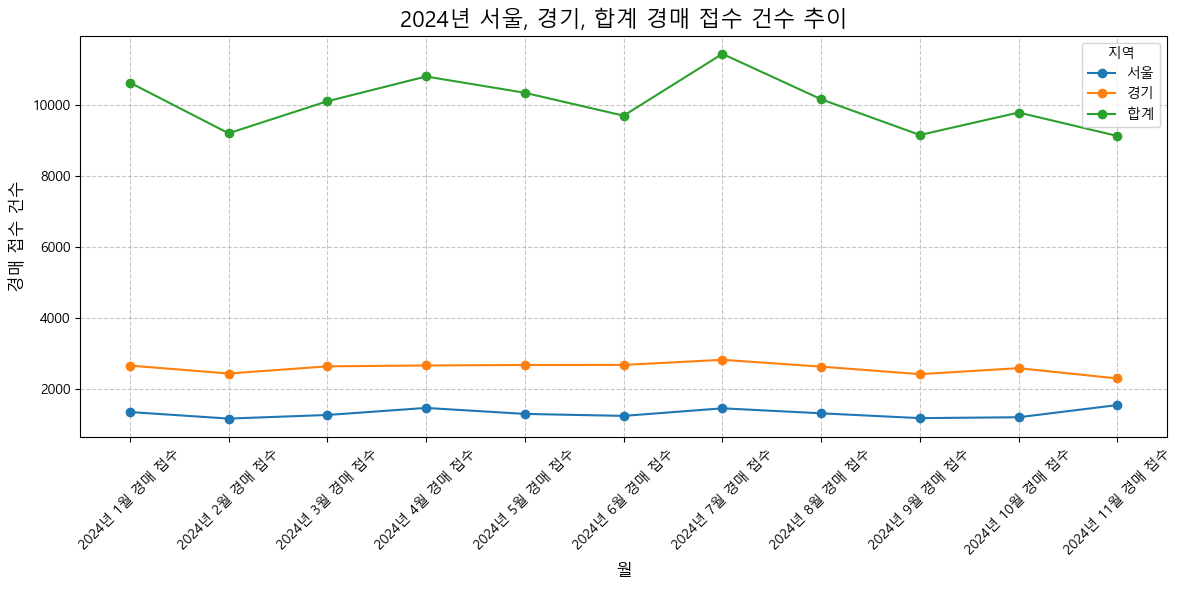

In [44]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(9, 5))

# 서울, 경기, 합계 데이터 필터링
plot_data = final_df[final_df['법원'].isin(['서울', '경기', '합계'])]

# x축: 월, y축: 경매 접수 건수 데이터 준비
months = [col for col in final_df.columns if '경매 접수' in col]  # 경매 접수 컬럼 선택
plot_data = plot_data.set_index('법원')  # 법원을 인덱스로 설정
plot_data = plot_data[months].T  # 전치하여 월별 데이터로 변환

# 그래프 그리기
plt.figure(figsize=(12, 6))
for region in plot_data.columns:
    plt.plot(months, plot_data[region], marker='o', label=region)

# 그래프 설정
plt.title('2024년 서울, 경기, 합계 경매 접수 건수 추이', fontsize=16)
plt.xlabel('월', fontsize=12)
plt.ylabel('경매 접수 건수', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='지역', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# 그래프 출력
plt.show()

### 후보

In [ ]:
import pandas as pd
data1 = pd.read_excel('../data/경기신보/21_집행-강제경매,임의경매(202401).xlsx')
data2 = pd.read_excel('../data/경기신보/21_집행-강제경매,임의경매(202402).xlsx')
data3 = pd.read_excel('../data/경기신보/21_집행-강제경매,임의경매(202403).xlsx')
data4 = pd.read_excel('../data/경기신보/21_집행-강제경매,임의경매(202404).xlsx')
data5 = pd.read_excel('../data/경기신보/21_집행-강제경매,임의경매(202405).xlsx')
data6 = pd.read_excel('../data/경기신보/21_집행-강제경매,임의경매(202406).xlsx')
data7 = pd.read_excel('../data/경기신보/21_집행-강제경매,임의경매(202407).xlsx')
data8 = pd.read_excel('../data/경기신보/21_집행-강제경매,임의경매(202408).xlsx')
data9 = pd.read_excel('../data/경기신보/21_집행-강제경매,임의경매(202409).xlsx')
data10 = pd.read_excel('../data/경기신보/21_집행-강제경매,임의경매(202410).xlsx')
data11 = pd.read_excel('../data/경기신보/21_집행-강제경매,임의경매(202411).xlsx')

### 1월 데이터 전처리

In [38]:
df1 = data1.iloc[0:74, 0:9]
df1 = df1.iloc[:, [0, 1, 4, 7]]
df1.columns = [
    '법원',
    '2024년 1월 강제경매',
    '2024년 1월 임의경매',
    '2024년 1월 경매 접수'
]

## 필요없는 행 삭제 (0행과 1행)
df1 = df1.drop([0, 1]).reset_index(drop=True)

## 숫자 열 변환 (object -> int)
numeric_columns = df1.columns[1:]  # 첫 번째 열(법원)은 제외
df1[numeric_columns] = df1[numeric_columns].apply(pd.to_numeric, errors='coerce')


## 서울, 경기 지역은 따로 필터링하여 추출 (타 지역과 다르게 소계로 구할 수 없음)
# 서울 지역 합계
seoul_data = df1[df1["법원"].str.contains("서울중앙지방법원|서울동부지방법원|서울남부지방법원|서울북부지방법원|서울서부지방법원")]
seoul_totals = seoul_data.sum(numeric_only=True)
seoul_totals["법원"] = "서울"

# 경기 지역 합계
gyeonggi_data = df1[df1["법원"].str.contains("의정부지방법원|의정부지방법원 고양지원|의정부지방법원 남양주지원|인천지방법원 부천지원|수원지방법원|수원지방법원 성남지원|수원지방법원 여주지원|수원지방법원 평택지원|수원지방법원 안산지원|수원지방법원 안양지원")]
gyeonggi_totals = gyeonggi_data.sum(numeric_only=True)
gyeonggi_totals["법원"] = "경기"

# 기존 데이터에 서울, 경기 행 추가
df1 = pd.concat([df1, pd.DataFrame([seoul_totals])], ignore_index=True)
df1 = pd.concat([df1, pd.DataFrame([gyeonggi_totals])], ignore_index=True)

## 소계 행을 지역 이름으로 변경
region_names = ["인천", "강원", "대전/충남", "충북", "대구/경북", "부산", "울산", "경남", "광주/전남", "전북", "제주"]
for i, name in zip([9, 24, 31, 36, 46, 50, 51, 58, 64, 69, 70], region_names):
    df1.loc[i, "법원"] = name

pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows', None)

## 최종 지역별 데이터만 필터링
result_regions = ["서울", "경기", "인천", "강원", "대전/충남", "충북", "대구/경북", "부산", "울산", "경남", "광주/전남", "전북", "제주"]
df1 = df1[df1["법원"].isin(result_regions)].reset_index(drop=True)

# df1 = df1.sort_values(by='2024년 1월 경매 접수', ascending=False).reset_index(drop=True)
df1
## 엑셀 파일로 저장
# df1.to_csv("../data/경기신보/result1226_1.csv", encoding="utf-8-sig", index=False)

,법원,2024년 1월 강제경매,2024년 1월 임의경매,2024년 1월 경매 접수
0,인천,376,453,829
1,강원,128,258,386
2,대전/충남,269,704,973
3,충북,100,264,364
4,대구/경북,295,718,1013
5,부산,166,381,547
6,울산,82,208,290
7,경남,201,541,742
8,광주/전남,276,471,747
9,전북,122,266,388


### 2월 데이터 전처리

In [30]:
df2 = data2.iloc[0:74, 0:9]
df2 = df2.iloc[:, [0, 1, 4, 7]]
df2.columns = [
    '법원',
    '2024년 2월 강제경매',
    '2024년 2월 임의경매',
    '2024년 2월 경매 접수'
]

## 필요없는 행 삭제 (0행과 1행)
df2 = df2.drop([0, 1]).reset_index(drop=True)

## 숫자 열 변환 (object -> int)
numeric_columns = df2.columns[1:]  # 첫 번째 열(법원)은 제외
df2[numeric_columns] = df2[numeric_columns].apply(pd.to_numeric, errors='coerce')


## 서울, 경기 지역은 따로 필터링하여 추출 (타 지역과 다르게 소계로 구할 수 없음)
# 서울 지역 합계
seoul_data2 = df2[df2["법원"].str.contains("서울중앙지방법원|서울동부지방법원|서울남부지방법원|서울북부지방법원|서울서부지방법원")]
seoul_totals2 = seoul_data2.sum(numeric_only=True)
seoul_totals2["법원"] = "서울"

# 경기 지역 합계
gyeonggi_data2 = df2[df2["법원"].str.contains("의정부지방법원|의정부지방법원 고양지원|의정부지방법원 남양주지원|인천지방법원 부천지원|수원지방법원|수원지방법원 성남지원|수원지방법원 여주지원|수원지방법원 평택지원|수원지방법원 안산지원|수원지방법원 안양지원")]
gyeonggi_totals2 = gyeonggi_data2.sum(numeric_only=True)
gyeonggi_totals2["법원"] = "경기"

# 기존 데이터에 서울, 경기 행 추가
df2 = pd.concat([df2, pd.DataFrame([seoul_totals2])], ignore_index=True)
df2 = pd.concat([df2, pd.DataFrame([gyeonggi_totals2])], ignore_index=True)

## 소계 행을 지역 이름으로 변경
region_names = ["인천", "강원", "대전/충남", "충북", "대구/경북", "부산", "울산", "경남", "광주/전남", "전북", "제주"]
for i, name in zip([9, 24, 31, 36, 46, 50, 51, 58, 64, 69, 70], region_names):
    df2.loc[i, "법원"] = name

pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows', None)

## 최종 지역별 데이터만 필터링
result_regions = ["서울", "경기", "인천", "강원", "대전/충남", "충북", "대구/경북", "부산", "울산", "경남", "광주/전남", "전북", "제주"]
df2 = df2[df2["법원"].isin(result_regions)].reset_index(drop=True)
df2

## 엑셀 파일로 저장
df2.to_csv("../data/경기신보/result1226_2.csv", encoding="utf-8-sig", index=False)

### 1 ~ n월 데이터 합치기

In [28]:
df = pd.merge(df1, df2, on="법원")
df

,법원,2024년 1월 강제경매,2024년 1월 임의경매,2024년 1월 경매 접수,2024년 2월 강제경매,2024년 2월 임의경매,2024년 2월 경매 접수
0,인천,376,453,829,296,426,722
1,강원,128,258,386,97,203,300
2,대전/충남,269,704,973,215,601,816
3,충북,100,264,364,95,235,330
4,대구/경북,295,718,1013,234,633,867
5,부산,166,381,547,145,342,487
6,울산,82,208,290,53,201,254
7,경남,201,541,742,178,489,667
8,광주/전남,276,471,747,207,369,576
9,전북,122,266,388,133,204,337
